In [1]:
import wrangle_superstore
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = wrangle_superstore.wrangle_superstore()

Using cached csv


In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,11.78,...,0.2,4.27,Office Supplies,Labels,Avery 508,Central,4.91,1.4239,Avery,Avery_Labels
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,3.54,...,0.8,-5.49,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Central,8.85,-2.7435,GBC,GBC_Binders
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,272.74,...,0.2,-64.77,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Central,113.64,-21.5916,SAFCO,SAFCO_Storage
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,9.34,...,0.2,1.17,Office Supplies,Art,Newell 312,Central,5.84,0.5840,Newell,Newell_Art


In [4]:
str.split('Maxell iVDR_Accessories')

['Maxell', 'iVDR_Accessories']

# Which product line should we expand?

## Top product lines by profit over time

In [5]:
# which product lines have highest profit overall time?
df.groupby('product_line').agg({'profit':'sum'}).sort_values(by='profit', ascending=False).head(15)
#store the above as a list
high_profit_lines = df.groupby('product_line').agg({'profit':'sum'}).sort_values(by='profit', ascending=False).head(15).index.tolist()
high_profit_lines

['Fellowes_Binders',
 'Canon_Copiers',
 'Xerox_Paper',
 'Logitech_Accessories',
 'Ativa_Machines',
 'Global_Chairs',
 'Canon_Machines',
 'Hewlett-Packard_Machines',
 'Hon_Chairs',
 'Plantronics_Accessories',
 'Maxell_Accessories',
 'Sharp_Copiers',
 'Panasonic_Phones',
 'Dot_Labels',
 'Hewlett_Copiers']

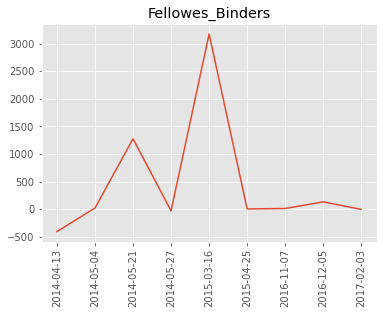

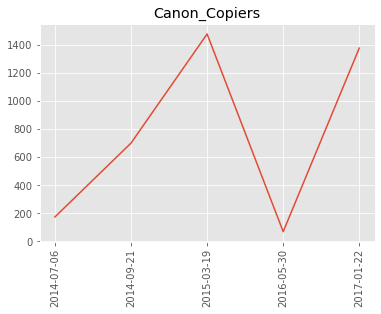

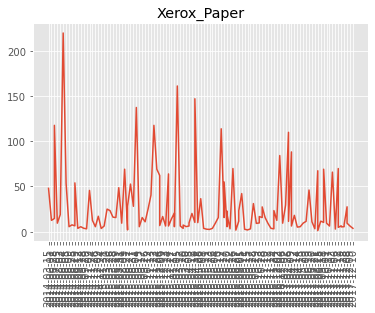

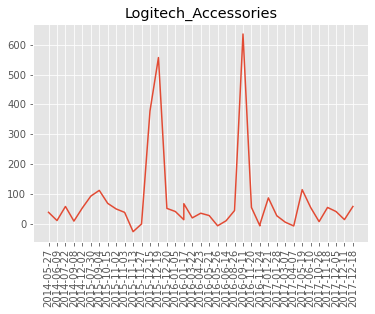

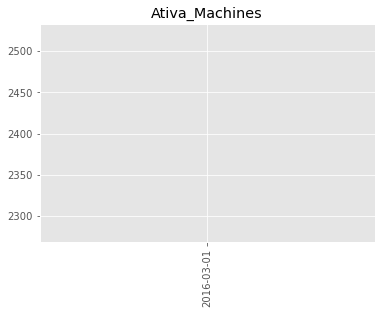

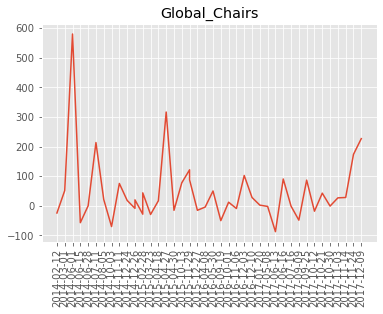

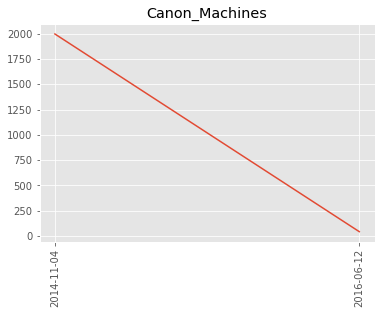

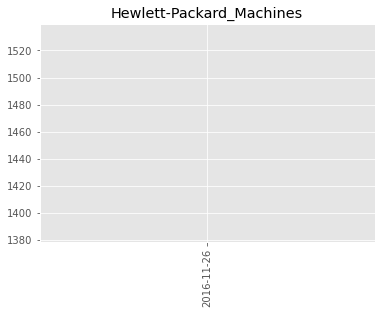

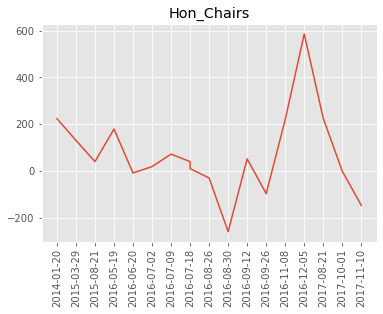

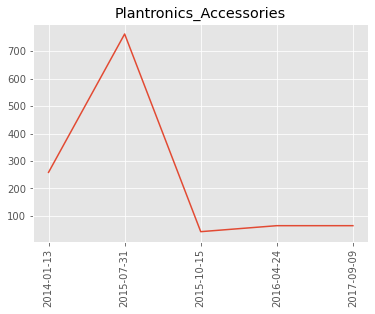

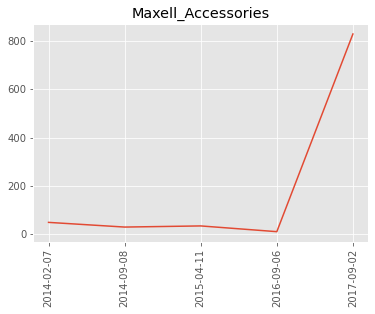

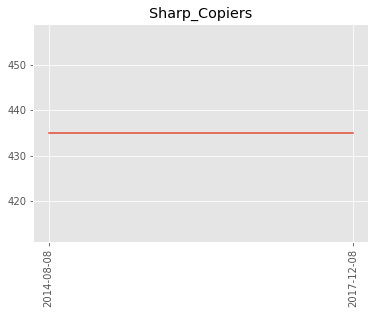

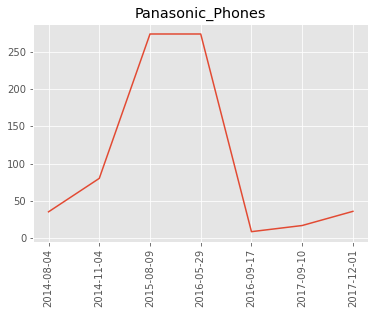

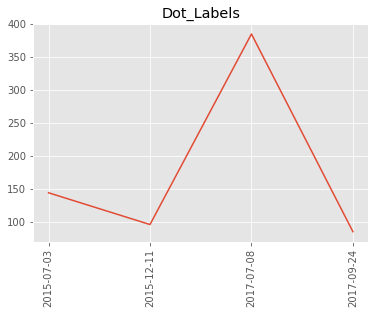

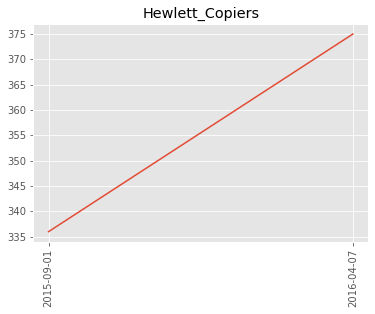

In [6]:
# line plot of profit for each product line
for product_line in high_profit_lines:
    plt.plot(df[df['product_line'] == product_line]['profit'])
    plt.title(product_line)
    plt.xticks(rotation=90)
    plt.show()

## top product lines with increasing profit over time

In [7]:
# how many product lines have ten or more orders?
df.groupby('product_line').agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)



,order_id
product_line,
Xerox_Paper,132
GBC_Binders,54
Avery_Labels,50
Newell_Art,45
Global_Chairs,43
Avery_Binders,41
Logitech_Accessories,39
Eldon_Furnishings,34
Wilson_Binders,31


## top profit per unit
